In [1]:
#Necesary imports.
import bitso
import pandas as pd
import numpy as np
from datetime import timezone
import datetime
from dateutil.tz import tzutc
import time
from fbprophet import Prophet
import matplotlib.pyplot as plt
from scipy.stats import boxcox
import warnings
warnings.filterwarnings('ignore')
import plotly.offline
from plotly import graph_objs as go

In [133]:
df = pd.read_csv('data_2015.csv')

In [134]:
df.date = df.date.astype('datetime64')

In [139]:
#Creating a function that needs a data frame and a number(month) for input.
def extraction(df, m):
    #variable that get's just the row that matches the same month
    f_df = df.loc[df['month'] == m]
    #variable that stores the year
    y = 2015
    #variable that creates a list with the numbers of days of the month
    days = list(f_df['day'].unique())
    #varible that creates a empty dictionary
    results = {}
    #list with the names of the keys in the dictionary that the function returns.
    nombres = ['date', '24h_avg', '12h_avg', 'min', 'max', 'volume', 'm_side']
    
    #for loop that creates new keys in the empty dictionary with a empty list as values.
    for i in nombres:
        results[i] = []
    
    #for that loops on each day in the list of the days of the month.
    for e in days:
        #variable that get's just the rows that match the day in the for loop.
        ndf = f_df.loc[f_df.day == e]
        #appending the results in each dictionary key.
        results['date'].append(datetime.date(y, m, e))
        results['24h_avg'].append(ndf.price.mean())
        results['12h_avg'].append(ndf.price.loc[ndf.hour<12].mean())
        results['max'].append(ndf.price.max())
        results['min'].append(ndf.price.min())
        results['volume'].append(ndf.volume.sum())
        weight = ndf.side.value_counts().sum()
        
        if len(ndf.side.value_counts()) == 2:
            buy = ndf.side.value_counts()['buy']/weight
            sell = ndf.side.value_counts()['sell']/weight
        else:
            if ndf.side.value_counts().index == 'buy':
                buy = ndf.side.value_counts().sum()/weight
            else:
                sell = ndf.side.value_counts().sum()/weight
                
        if buy>sell:
            results['m_side'].append('buy')
        else:
            results['m_side'].append('sell')
            
    #returns the dictionary with the appended elements
    return results

In [160]:
all_df = pd.DataFrame(columns=['date', '24h_avg', '12h_avg', 'min', 'max', 'volume', 'm_side'])
for i in df.month.unique():
    df_new = pd.DataFrame.from_dict(extraction(df,i))
    all_df = all_df.append(df_new)

In [167]:
all_df.fillna(method='bfill', inplace=True)

In [169]:
all_df

,date,24h_avg,12h_avg,min,max,volume,m_side
0,2015-01-02,4599.681818,4630.500000,4480,4647,1,sell
1,2015-01-03,4523.370370,4630.500000,4383,4660,5,buy
2,2015-01-04,4221.812500,4343.125000,3975,4455,0,buy
3,2015-01-05,4086.368421,4054.000000,3950,4150,4,sell
4,2015-01-06,4049.363636,4081.800000,3875,4225,2,sell
...,...,...,...,...,...,...,...
26,2015-12-27,7251.280488,7226.448276,7059,7339,3,sell
27,2015-12-28,7323.934010,7358.821918,7180,7412,5,sell
28,2015-12-29,7378.569892,7301.071429,7228,7580,54,sell
29,2015-12-30,7500.433333,7546.661765,7320,7695,5,sell


In [170]:
all_df.to_csv('df_2015.csv', index=False)

In [179]:
uno = pd.read_csv('df_2014.csv')
dos = pd.read_csv('df_2015.csv')
tres = pd.concat([uno, dos], ignore_index=True)
tres.to_csv('df14-15.csv', index=False)

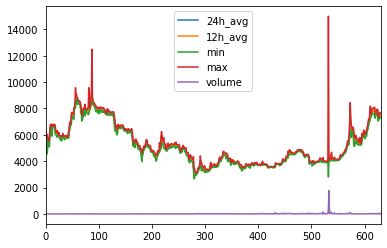